In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

**Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shreyassharma63/Dataset/main/Car%20Price.csv')
data

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**Analyzing the data**

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

**shape – shape** will display the number of observations(rows) and features(columns) in the dataset

There are 4340 observations and 9 variables in our dataset

**head() ** will display the top 5 observations of the dataset

In [3]:
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**tail()** will display the last 5 observations of the dataset

In [4]:
data.tail()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


The dataset contained no null values, but there were duplicate values as shown

In [6]:
data[data.duplicated()]

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
13,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4307,Mahindra,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [7]:
print('Count before removing duplicate rows :',data.shape)
Before_duplicates_drop=data.duplicated().sum()
print('Total Duplicate rows :',Before_duplicates_drop)
data.drop_duplicates(keep='first',inplace=True)
print('Count after removing duplicate rows :',data.shape)

Count before removing duplicate rows : (4340, 9)
Total Duplicate rows : 763
Count after removing duplicate rows : (3577, 9)


After dropping duplicate samples, the size of dataset reduced to 3577 from 4340.

**Check for duplication**

nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [8]:
data.nunique()

Brand              29
Model            1491
Year               27
Selling_Price     445
KM_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

**Missing values Calculation**

isnull() is widely been in all pre-processing steps to identify null values in the data

Here, data.isnull().sum() is used to get the number of missing records in each column

In [9]:
data.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

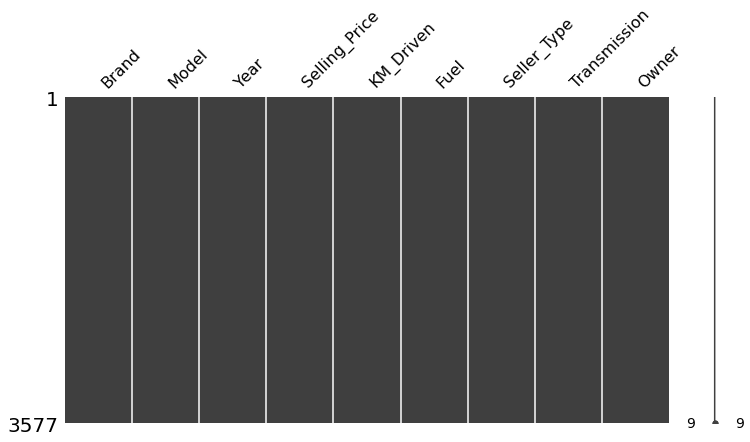

In [10]:
msno.matrix(data,figsize=(12,6))

**Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

**Creating Features**

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Car_Age” to know the age of the car

In [11]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year - data['Year']
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


**EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.


*   EDA can be leveraged to check for outliers, patterns, and trends in the given data.
*   EDA helps to find meaningful patterns in data.
*   EDA provides in-depth insights into the data sets to solve our business problems.
*   EDA gives a clue to impute missing values in the dataset.


**Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [12]:
data.describe()

,Year,Selling_Price,KM_Driven,Car_Age
count,3577.000000,3.577000e+03,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,10.037462
std,4.251759,5.093018e+05,47579.940016,4.251759
min,1992.000000,2.000000e+04,1.000000,3.000000
25%,2010.000000,2.000000e+05,36000.000000,7.000000
50%,2013.000000,3.500000e+05,60000.000000,10.000000
75%,2016.000000,6.000000e+05,90000.000000,13.000000
max,2020.000000,8.900000e+06,806599.000000,31.000000


From the statistics summary, we can infer the below findings :

  * Years range from 1992- 2020 and has a high in a range which shows used cars 
contain both latest models and old model cars.
  * On average of Kilometers-driven in Used cars are ~69k KM.
  * The max price of a used car is 8.9 L.

describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [13]:
data.describe(include='all')

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
count,3577,3577,3577.000000,3.577000e+03,3577.000000,3577,3577,3577,3577,3577.000000
unique,29,1491,NaN,NaN,NaN,5,3,2,5,NaN
top,Maruti,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN
freq,1072,54,NaN,NaN,NaN,1800,2832,3265,2218,NaN
mean,NaN,NaN,2012.962538,4.739125e+05,69250.545709,NaN,NaN,NaN,NaN,10.037462
std,NaN,NaN,4.251759,5.093018e+05,47579.940016,NaN,NaN,NaN,NaN,4.251759
min,NaN,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,2010.000000,2.000000e+05,36000.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,NaN,2013.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN,13.000000


**EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Here we plot **boxplot()**- for outliers Detection

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


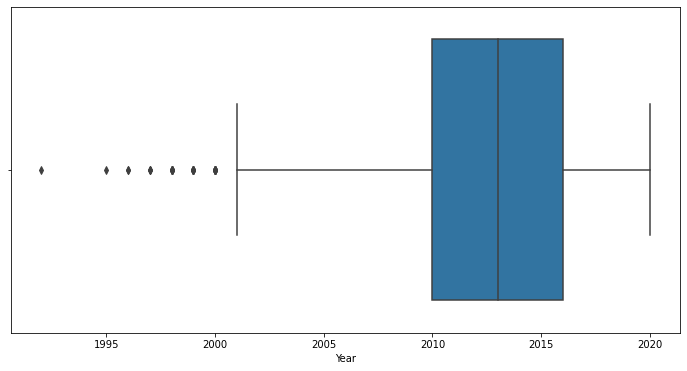

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Year'])
plt.show()

In this boxplot most of the data lies in the range of year 2004-2020. We decided to keep the outliers to
have view of all the different classic cars.

**Categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


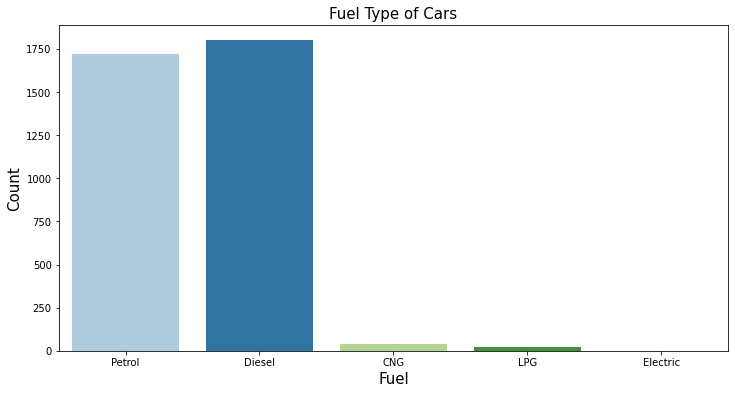

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data['Fuel'],palette='Paired')
plt.title('Fuel Type of Cars',fontsize=15)
plt.xlabel('Fuel',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


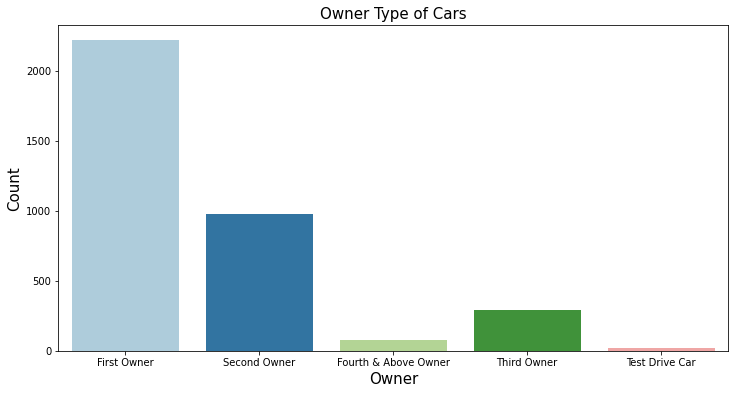

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data['Owner'],palette='Paired')
plt.title('Owner Type of Cars',fontsize=15)
plt.xlabel('Owner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


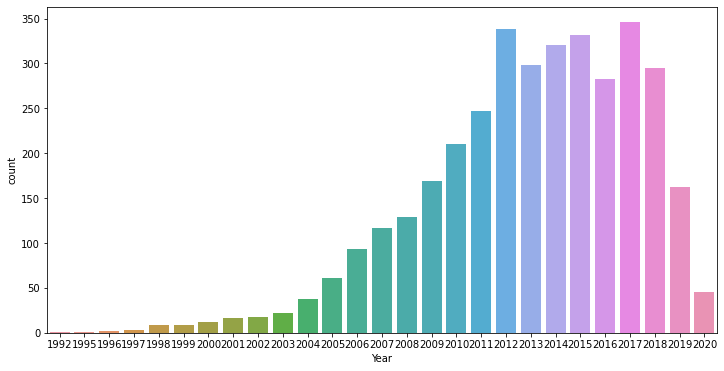

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data['Year'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


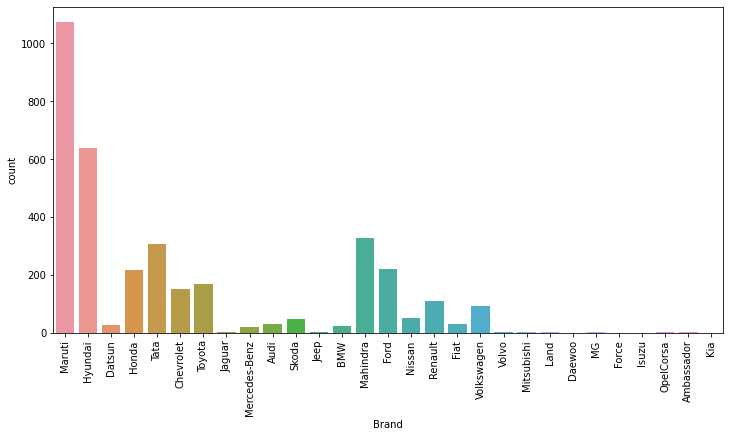

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data['Brand'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


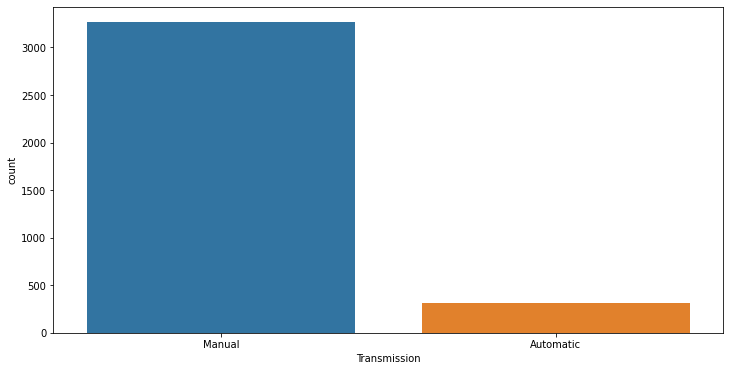

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data['Transmission'])
plt.show()

From the count plot, we can have below observations

~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance

~85% of cars have manual transmission

~70 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars

~20% of cars belong to the brand Maruti followed by 10% of cars belonging to Hyundai

Maruti ranks first among all models which are available for purchase



**EDA Bivariate Analysis**

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous.

In [20]:
data.corr()

,Year,Selling_Price,KM_Driven,Car_Age
Year,1.00000,0.424260,-0.417490,-1.00000
Selling_Price,0.42426,1.000000,-0.187359,-0.42426
KM_Driven,-0.41749,-0.187359,1.000000,0.41749
Car_Age,-1.00000,-0.424260,0.417490,1.00000


A pair plot has been used to show the relationship between two Categorical variables.

<Figure size 936x1224 with 0 Axes>

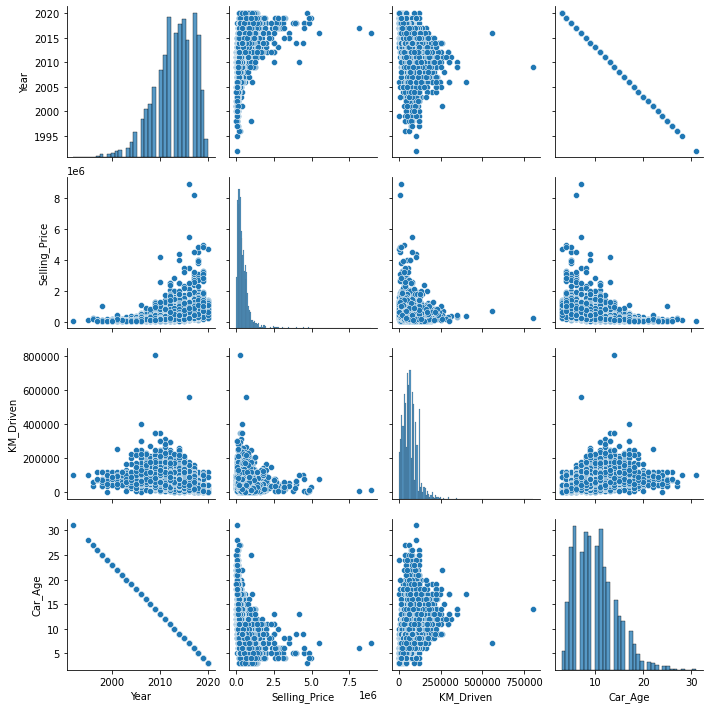

In [21]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data)
plt.show()

**A bar plot can be used to show the relationship between Categorical variables and continuous variables**

Text(0.5, 1.0, 'Brand Vs Selling_Price')

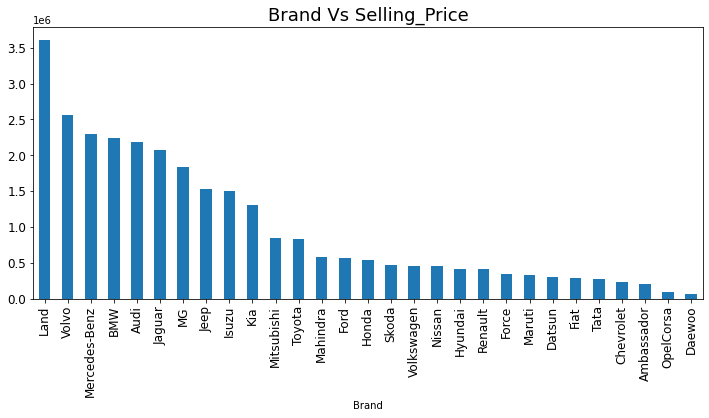

In [22]:
plt.figure(figsize=(12,5))
data.groupby('Brand')['Selling_Price'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("Brand Vs Selling_Price", fontsize=18)

Text(0.5, 1.0, 'Fuel Vs Selling_Price')

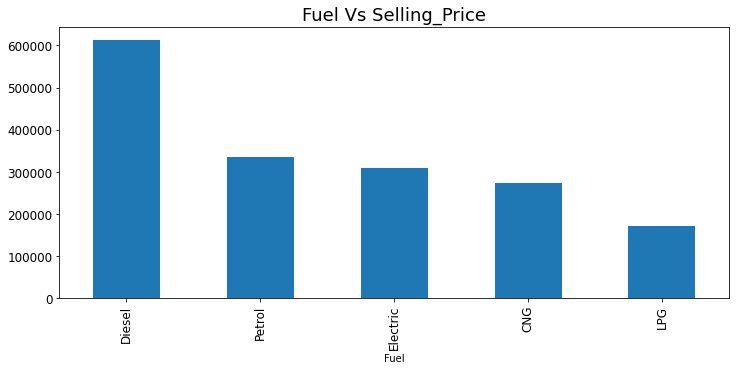

In [23]:
plt.figure(figsize=(12,5))
data.groupby('Fuel')['Selling_Price'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("Fuel Vs Selling_Price", fontsize=18)


Text(0.5, 1.0, 'Transmission Vs Selling_Price')

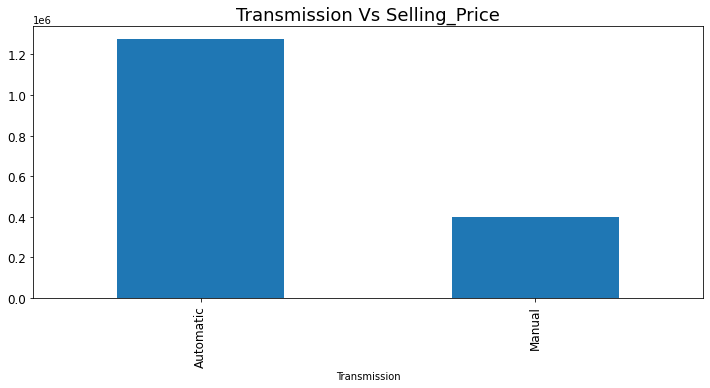

In [24]:
plt.figure(figsize=(12,5))
data.groupby('Transmission')['Selling_Price'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("Transmission Vs Selling_Price", fontsize=18)

Text(0.5, 1.0, 'Owner Vs Selling_Price')

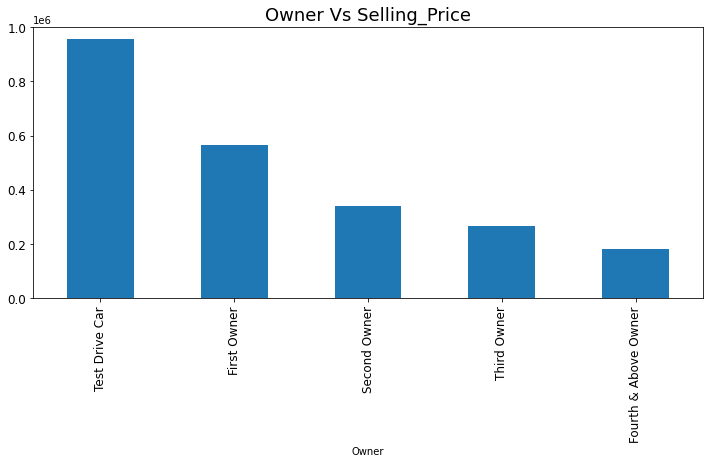

In [25]:
plt.figure(figsize=(12,5))
data.groupby('Owner')['Selling_Price'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("Owner Vs Selling_Price", fontsize=18)

Text(0.5, 1.0, 'Car Age Vs Selling_Price')

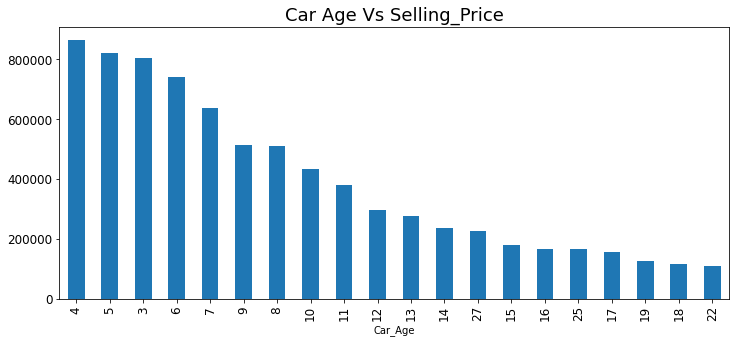

In [26]:
plt.figure(figsize=(12,5))
data.groupby('Car_Age')['Selling_Price'].mean().sort_values(ascending=False).head(20).plot.bar(fontsize=12)
plt.title("Car Age Vs Selling_Price", fontsize=18)

**EDA Multivariate Analysis**

As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In this heat map shows the correlation between the variables.

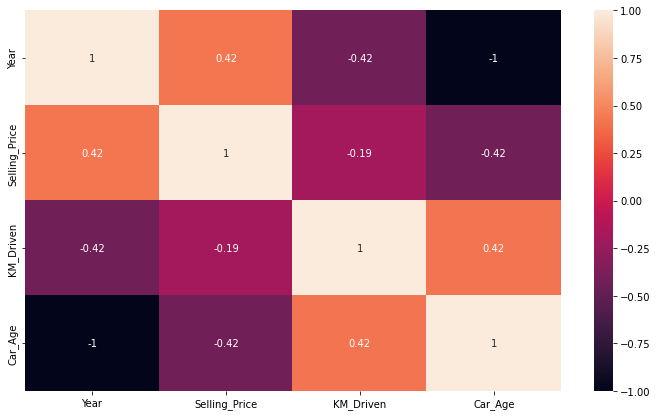

In [27]:
plt.figure(figsize=(12, 7))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

From the Heat map, we can infer the following:

•	Price is moderately positive in correlation to year.

•	Kilometer driven has a negative correlation to year not much impact on the price

•	Car age has a negative correlation with Price

•	Car Age is positively correlated to Kilometers-Driven as the Age of the car increases;

 then the kilometer will also increase.


**Lets separate Numerical and categorical variables for easy analysis**

In [28]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Brand', 'Model', 'Fuel', 'Seller_Type', 'Transmission', 'Owner'], dtype='object')
Numerical Variables:
['Year', 'Selling_Price', 'KM_Driven', 'Car_Age']


The encoding Technique is used to turn categorical data into numerical data since machine learning
algorithms cannot process categorical data. LabelEncoder is used in this project.

In [29]:
from sklearn.preprocessing import LabelEncoder

#from sklearn.preprocessing import OneHotEncoder
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])
        
data['Selling_Price'] = LabelEncoder().fit_transform(data['Selling_Price'])  
    
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
0,18,775,2007,17,70000,4,1,1,0,16
1,18,1041,2007,60,50000,4,1,1,0,16
2,10,505,2012,236,100000,1,1,1,0,11
3,5,118,2017,114,46000,4,1,1,0,6
4,9,279,2014,193,141000,1,1,1,2,9


In [30]:
# storing the Dependent Variables in X and Independent Variable in Y

X = data.drop('Selling_Price', axis=1)
Y = data['Selling_Price']
X.shape, Y.shape

((3577, 9), (3577,))

In [31]:
# Creating the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((2503, 9), (1074, 9), (2503,), (1074,))

In [32]:
# Transforming each value in the column proportionally within the range [0,1]

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,0,1,2,3,4,5,6,7,8
0,0.892857,0.859637,0.608696,0.024673,1.00,0.5,1.0,0.00,0.391304
1,0.642857,0.666219,0.739130,0.070551,0.25,0.5,1.0,0.50,0.260870
2,0.107143,0.036938,0.782609,0.053192,1.00,0.0,1.0,0.00,0.217391
3,0.892857,0.898590,0.565217,0.086670,0.25,0.5,1.0,0.50,0.434783
4,0.964286,0.991269,0.826087,0.086670,0.25,0.5,0.0,0.00,0.173913
...,...,...,...,...,...,...,...,...,...
2498,0.321429,0.203492,0.608696,0.086670,1.00,0.5,0.0,0.50,0.391304
2499,0.821429,0.758899,0.913043,0.049472,0.25,0.5,1.0,0.00,0.086957
2500,0.892857,0.841504,0.391304,0.136267,1.00,0.5,1.0,0.50,0.608696
2501,0.285714,0.159839,1.000000,0.000000,1.00,0.0,1.0,0.75,0.000000


In [33]:
# Building the Regression Model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)

In [34]:
from sklearn import metrics

print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(Y_test, y_pred),3)) 
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(Y_test, y_pred),3))   
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(Y_test, y_pred),6))

Mean Squared Error (MSE): 3986.226
Mean Absolute Error (MAE): 51.052
Root Mean Squared Error (RMSE): 63.137
R2_score: 0.59454


The R-square of training data is 45% while the RMSE is very high which indicates that model is not
trained efficiently. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


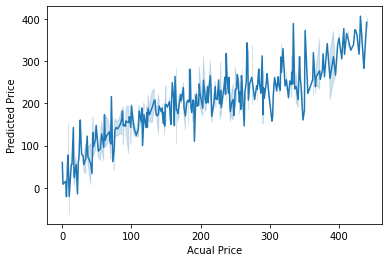

In [35]:
plt.xlabel("Acual Price")
plt.ylabel("Predicted Price")
sns.lineplot(Y_test,y_pred)
plt.show()

In [36]:
# Building the 2nd Regression Model

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
y_pred = RF.predict(X_test)

In [37]:
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(Y_test, y_pred),3)) 
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(Y_test, y_pred),3))   
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(Y_test, y_pred),6))

Mean Squared Error (MSE): 2468.825
Mean Absolute Error (MAE): 36.179
Root Mean Squared Error (RMSE): 49.687
R2_score: 0.748883


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

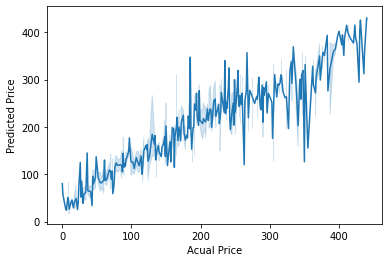

In [38]:
plt.xlabel("Acual Price")
plt.ylabel("Predicted Price")
sns.lineplot(Y_test,y_pred)
plt.show

In [39]:
# Building the 3rd Regression Model

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)

In [40]:
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(Y_test, y_pred),3)) 
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(Y_test, y_pred),3))   
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(Y_test, y_pred),6))

Mean Squared Error (MSE): 4010.638
Mean Absolute Error (MAE): 44.499
Root Mean Squared Error (RMSE): 63.33
R2_score: 0.592057


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

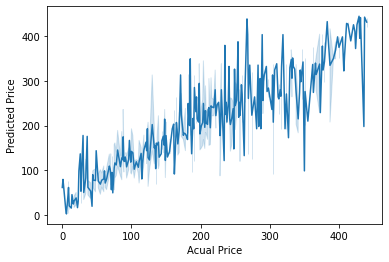

In [41]:
plt.xlabel("Acual Price")
plt.ylabel("Predicted Price")
sns.lineplot(Y_test,y_pred)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


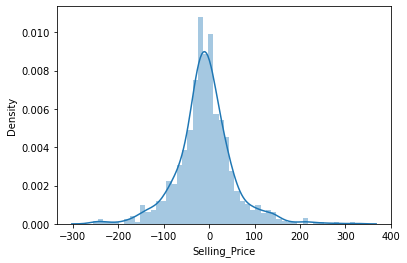

In [42]:
sns.distplot(Y_test-y_pred)
plt.show()